# GRIP: The Sparks Foundation (June 2022)
##### Data Science & Business Analytics Intern
#### Author: Ashish Haldar
###### Task : Prediction Using Decision Tree Algorithm
In this task we need create the Decision Tree classifier and visualize it graphically.

### Importing Modules

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

### Loading Dataset

In [3]:
dataset = sns.load_dataset("iris")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Some Info. & Descriptive Statistics

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Some EDA

In [7]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no values present in this dataset

<AxesSubplot:>

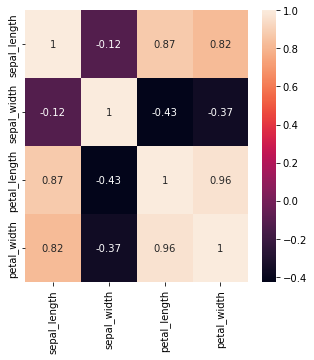

In [12]:
fig,ax =plt.subplots(figsize=(5,5))
sns.heatmap(dataset.corr(),annot=True,ax=ax)

We can see there is postive correlation between petal_length, sepal_length & petal_width

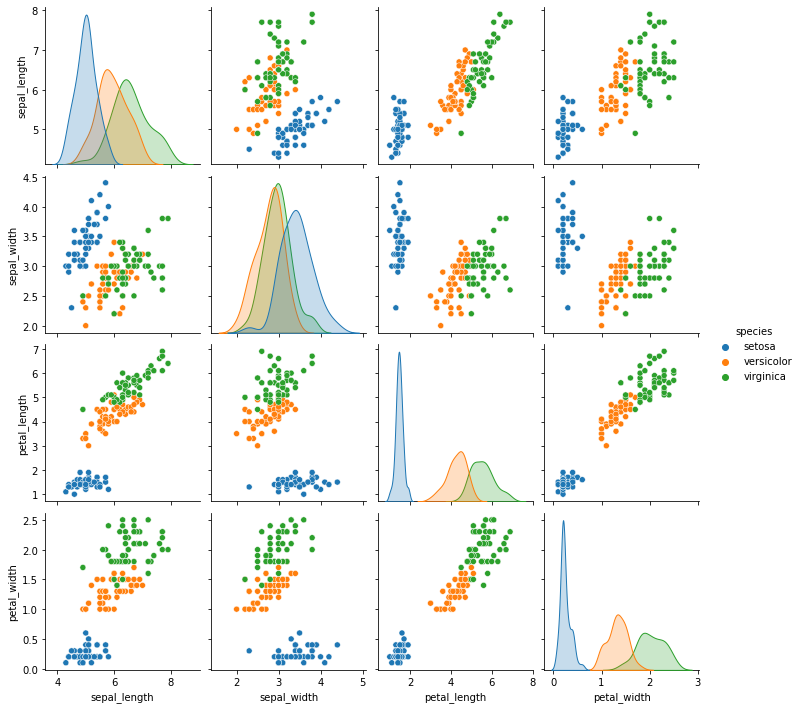

In [10]:
sns.pairplot(data=dataset,hue="species")
plt.show()

This shows that setosa is completly separable from versicolor and virginica

### Label Encoder

In [13]:
dataset["species"]=LabelEncoder().fit_transform(dataset["species"])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [94]:
## Independent & Dependent Variable
X = dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [16]:
#Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

The DecisionTreeClassifier is assigned to classifer and set max_dept = 3 and random_state = 10. Here,the max_depth parameter is the maximum depth the tree, which we control to ensure there is no overfitting and that we can easily follow how the final result was achieved. The random_state parameter ensures that the results can be replicated in further analyses

In [24]:
classifier = DecisionTreeClassifier(max_depth=3,random_state=10)

Fitting algorithm to training data

In [ ]:
model_0=classifier.fit(X_train,y_train)

### Tree Diagram

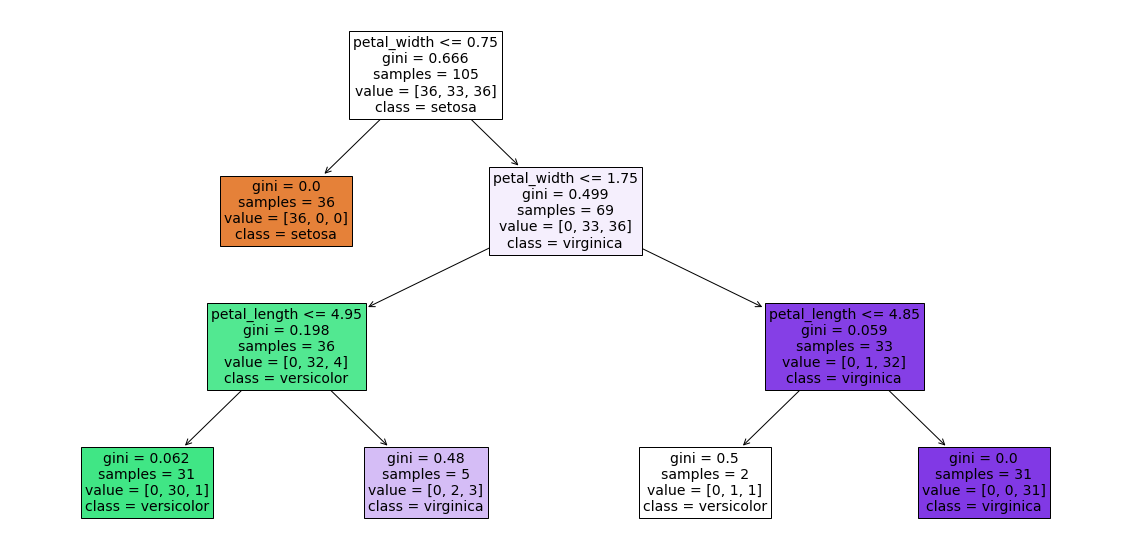

In [103]:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier,feature_names=X.columns,class_names=["setosa","versicolor","virginica"],filled=True, fontsize=14)
plt.show()

Here,the first split is based on the petal_width, with being less than 0.75 cm being identified as setosa, while those with greater being classed as Iris-virginica. However, a further split occurs for those with petal length greater than 0.75, with two further splits to end up with more accurate final classifications.

### Confusion Matrix

In [28]:
y_pred=model_0.predict(X_test)

In [30]:
conf_mat=confusion_matrix(y_test,y_pred)

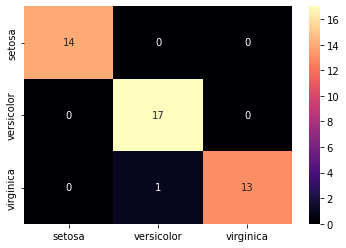

<Figure size 720x504 with 0 Axes>

In [44]:
matrix=pd.DataFrame(conf_mat,index=["setosa","versicolor","virginica"],columns=["setosa","versicolor","virginica"])
axis = plt.axes()
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt="g", ax=axis, cmap="magma")
plt.show()

This shows that only one data has failed to be predicted from the versicolor class, which suggests that overall this algorithm has done well on predicting unseen data.

### Measuring Performances 
* Accuracy represents the number of correctly classified data instances over the total number of data instances.
* Precision tells us how many of the values we predicted to be in a certain class are actually in that class. Essentially, this tells us how we performed in terms of false positives.
* Recall tells us how many of the values in each class were given the correct label, thus telling use how it performed relative to false negatives.
* This is a weighted average of precision and recall scale, with 1 being the best and 0 the worst.

Here the support for each class is simply the number of occurrences in each class in the test labels.

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Here, accuracy of our basic model is 98% means only 2% of our data is misclassified in wrong group. That we can see in above confusion matrix where only one data point is misclassified.

### Feature Importance

In [50]:
importance = pd.DataFrame({"feature":X_train.columns,"importance":np.round(classifier.feature_importances_,3)})
importance.sort_values("importance", ascending=False,inplace=True)
print(importance)

        feature  importance
3   petal_width       0.942
2  petal_length       0.058
0  sepal_length       0.000
1   sepal_width       0.000


This shows that petal_width had the greatest importance as the first division was based on this. However, since only one decision tree has been run this does not mean that the other features are not important, only that they were not needed in this decision tree.